In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, roc_auc_score, average_precision_score, precision_recall_curve
)

from xgboost import XGBClassifier

In [ ]:
df_hospital = pd.read_csv('/content/csv_hospitalreports1621e_odp (1).csv', sep=',', encoding='latin')
display(df_hospital.head())


,County,OSHPDID,Performance Measure,Risk-adjusted Rate,Longitude,Latitude,Type of Report,Hospital Ratings,# of Cases,# of Adverse Events,Year,CNT_WORSE,CNT_BETTER,Rating,Procedure Condition,Performance Measure2,hospital,system
0,Alameda,106010735,Pneumonia,3.0,-122.253,37.76266,IMI,As Expected,76.0,2.0,2016,1,0,Only 1 Rating is Worse,Condition,IMI-Pneumonia,Alameda Hospital,Alameda Health System
1,Alameda,106010735,Heart Failure,2.1,-122.253,37.76266,IMI,As Expected,111.0,2.0,2016,1,0,Only 1 Rating is Worse,Condition,IMI-Heart Failure,Alameda Hospital,Alameda Health System
2,Alameda,106010735,GI Hemorrhage,4.6,-122.253,37.76266,IMI,As Expected,83.0,5.0,2016,1,0,Only 1 Rating is Worse,Condition,IMI-GI Hemorrhage,Alameda Hospital,Alameda Health System
3,Alameda,106010735,PCI,NaN,-122.253,37.76266,IMI,NaN,NaN,NaN,2016,1,0,Only 1 Rating is Worse,Procedure,IMI-PCI,Alameda Hospital,Alameda Health System
4,Alameda,106010735,Acute Stroke Subarachnoid,NaN,-122.253,37.76266,IMI,NaN,NaN,NaN,2016,1,0,Only 1 Rating is Worse,Condition,IMI-Acute Stroke Subarachnoid,Alameda Hospital,Alameda Health System


In [ ]:
df_hospital.rename(columns={
    "County": "condado",
    "OSHPDID": "id_oshpd",
    "Performance Measure": "medida_desempenho",
    "Risk-adjusted Rate": "taxa_ajustada_risco",
    "Longitude": "longitude",
    "Latitude": "latitude",
    "Type of Report": "tipo_relatorio",
    "Hospital Ratings": "classificacao_hospital",
    "# of Cases": "numero_casos",
    "# of Adverse Events": "numero_eventos_adversos",
    "Year": "ano",
    "CNT_WORSE": "qtd_pior_desempenho",
    "CNT_BETTER": "qtd_melhor_desempenho",
    "Rating": "avaliacao",
    "Procedure Condition": "procedimento_condicao",
    "Performance Measure2": "medida_desempenho_2",
    "hospital": "hospital",
    "system": "sistema"
}, inplace=True)

In [ ]:
df_hospital

,condado,id_oshpd,medida_desempenho,taxa_ajustada_risco,longitude,latitude,tipo_relatorio,classificacao_hospital,numero_casos,numero_eventos_adversos,ano,qtd_pior_desempenho,qtd_melhor_desempenho,avaliacao,procedimento_condicao,medida_desempenho_2,hospital,sistema
0,Alameda,106010735,Pneumonia,3.00,-122.253,37.76266,IMI,As Expected,76.0,2.0,2016,1,0,Only 1 Rating is Worse,Condition,IMI-Pneumonia,Alameda Hospital,Alameda Health System
1,Alameda,106010735,Heart Failure,2.10,-122.253,37.76266,IMI,As Expected,111.0,2.0,2016,1,0,Only 1 Rating is Worse,Condition,IMI-Heart Failure,Alameda Hospital,Alameda Health System
2,Alameda,106010735,GI Hemorrhage,4.60,-122.253,37.76266,IMI,As Expected,83.0,5.0,2016,1,0,Only 1 Rating is Worse,Condition,IMI-GI Hemorrhage,Alameda Hospital,Alameda Health System
3,Alameda,106010735,PCI,NaN,-122.253,37.76266,IMI,NaN,NaN,NaN,2016,1,0,Only 1 Rating is Worse,Procedure,IMI-PCI,Alameda Hospital,Alameda Health System
4,Alameda,106010735,Acute Stroke Subarachnoid,NaN,-122.253,37.76266,IMI,NaN,NaN,NaN,2016,1,0,Only 1 Rating is Worse,Condition,IMI-Acute Stroke Subarachnoid,Alameda Hospital,Alameda Health System
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27274,Yuba,106580996,Acute Stroke,8.90,-121.593,39.13880,IMI,As Expected,268.0,19.0,2021,0,0,All Ratings are As Expected,NaN,IMI-Acute Stroke,Adventist Health and Rideout,Adventist Health Systems
27275,Yuba,106580996,AMI,8.30,-121.593,39.13880,IMI,As Expected,211.0,16.0,2021,0,0,All Ratings are As Expected,NaN,IMI-AMI,Adventist Health and Rideout,Adventist Health Systems
27276,Yuba,106580996,AAA Repair Open Unrupture,NaN,-121.593,39.13880,IMI,NaN,NaN,NaN,2021,0,0,All Ratings are As Expected,NaN,IMI-AAA Repair Open Unrupture,Adventist Health and Rideout,Adventist Health Systems
27277,Yuba,106580996,AAA Repair Endo Unrupture,0.00,-121.593,39.13880,IMI,As Expected,9.0,0.0,2021,0,0,All Ratings are As Expected,NaN,IMI-AAA Repair Endo Unrupture,Adventist Health and Rideout,Adventist Health Systems


In [ ]:
df_emergency = pd.read_csv('/content/2016-2023-imi-results-long-view (1).csv')
display(df_emergency.head())

,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,Risk Adjuested Mortality Rate,# of Deaths,# of Cases,Hospital Ratings,LONGITUDE,LATITUDE
0,2016,AAAA,STATEWIDE,NaN,AAA Repair Unruptured,1.3,30,2358,NaN,NaN,NaN
1,2016,AAAA,STATEWIDE,NaN,AMI,6.1,3178,52167,NaN,NaN,NaN
2,2016,AAAA,STATEWIDE,NaN,Acute Stroke,9.1,5482,60184,NaN,NaN,NaN
3,2016,AAAA,STATEWIDE,NaN,Acute Stroke Hemorrhagic,21.1,2580,12210,NaN,NaN,NaN
4,2016,AAAA,STATEWIDE,NaN,Acute Stroke Ischemic,5,2258,45141,NaN,NaN,NaN


In [ ]:
df_emergency.rename(columns={
    "YEAR": "ano",
    "COUNTY": "condado",
    "HOSPITAL": "hospital",
    "OSHPDID": "id_oshpd",
    "Procedure/Condition": "procedimento",
    "Risk Adjuested Mortality Rate": "taxa_mortalidade",
    "# of Deaths": "numero_obitos",
    "# of Cases": "numero_casos",
    "Hospital Ratings": "avaliacao_hospitalar",
    "LONGITUDE": "longitude",
    "LATITUDE": "latitude"
}, inplace=True)


In [ ]:
df_emergency

,ano,condado,hospital,id_oshpd,procedimento,taxa_mortalidade,numero_obitos,numero_casos,avaliacao_hospitalar,longitude,latitude
0,2016,AAAA,STATEWIDE,NaN,AAA Repair Unruptured,1.3,30,2358,NaN,NaN,NaN
1,2016,AAAA,STATEWIDE,NaN,AMI,6.1,3178,52167,NaN,NaN,NaN
2,2016,AAAA,STATEWIDE,NaN,Acute Stroke,9.1,5482,60184,NaN,NaN,NaN
3,2016,AAAA,STATEWIDE,NaN,Acute Stroke Hemorrhagic,21.1,2580,12210,NaN,NaN,NaN
4,2016,AAAA,STATEWIDE,NaN,Acute Stroke Ischemic,5,2258,45141,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
60493,2023,Yuba,Adventist Health and Rideout,106580996.0,Heart Failure,4,25,669,As Expected,-121.5942332,39.1381501
60494,2023,Yuba,Adventist Health and Rideout,106580996.0,Hip Fracture,0,0,125,As Expected,-121.5942332,39.1381501
60495,2023,Yuba,Adventist Health and Rideout,106580996.0,PCI,5.1,11,216,As Expected,-121.5942332,39.1381501
60496,2023,Yuba,Adventist Health and Rideout,106580996.0,Pancreatic Resection,NaN,NaN,NaN,NaN,-121.5942332,39.1381501


In [ ]:
df_emergency.columns.tolist()

['ano',
 'condado',
 'hospital',
 'id_oshpd',
 'procedimento',
 'taxa_mortalidade',
 'numero_obitos',
 'numero_casos',
 'avaliacao_hospitalar',
 'longitude',
 'latitude']

In [ ]:
df_emergency = df_emergency.dropna(subset=["id_oshpd"])

In [ ]:
df_hospital['id_oshpd'] = df_hospital['id_oshpd'].astype(float).astype(int).astype(str)
df_emergency['id_oshpd'] = df_emergency['id_oshpd'].astype(float).astype(int).astype(str)

df_emergency['latitude'] = df_emergency['latitude'].astype(str)
df_emergency['longitude'] = df_emergency['longitude'].astype(str)

df_hospital['latitude'] = df_hospital['latitude'].astype(str)
df_hospital['longitude'] = df_hospital['longitude'].astype(str)

df_hospital['condado'] = df_hospital['condado'].astype(str)
df_emergency['condado'] = df_emergency['condado'].astype(str)

/tmp/ipython-input-3611270734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emergency['id_oshpd'] = df_emergency['id_oshpd'].astype(float).astype(int).astype(str)
/tmp/ipython-input-3611270734.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emergency['latitude'] = df_emergency['latitude'].astype(str)
/tmp/ipython-input-3611270734.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
df_emergency

,ano,condado,hospital,id_oshpd,procedimento,taxa_mortalidade,numero_obitos,numero_casos,avaliacao_hospitalar,longitude,latitude
16,2016,Alameda,Alameda Hospital,106010735,AAA Repair Unruptured,.,.,.,NaN,-122.253991,37.76266
17,2016,Alameda,Alameda Hospital,106010735,AMI,16.1,3,17,As Expected,-122.253991,37.76266
18,2016,Alameda,Alameda Hospital,106010735,Acute Stroke,23.6,9,74,Worse,-122.253991,37.76266
19,2016,Alameda,Alameda Hospital,106010735,Acute Stroke Hemorrhagic,48.9,5,9,Worse,-122.253991,37.76266
20,2016,Alameda,Alameda Hospital,106010735,Acute Stroke Ischemic,15.2,4,65,As Expected,-122.253991,37.76266
...,...,...,...,...,...,...,...,...,...,...,...
60493,2023,Yuba,Adventist Health and Rideout,106580996,Heart Failure,4,25,669,As Expected,-121.5942332,39.1381501
60494,2023,Yuba,Adventist Health and Rideout,106580996,Hip Fracture,0,0,125,As Expected,-121.5942332,39.1381501
60495,2023,Yuba,Adventist Health and Rideout,106580996,PCI,5.1,11,216,As Expected,-121.5942332,39.1381501
60496,2023,Yuba,Adventist Health and Rideout,106580996,Pancreatic Resection,NaN,NaN,NaN,NaN,-121.5942332,39.1381501


In [ ]:
print(df_hospital['ano'].unique())
print(df_emergency['ano'].unique())

[2016 2017 2018 2019 2020 2021]
[2016 2017 2018 2019 2020 2021 2022 2023]


In [ ]:
base_dados = pd.merge(df_hospital, df_emergency, on=["id_oshpd",'longitude','latitude','ano','condado'],how='inner')

In [ ]:
base_dados

,condado,id_oshpd,medida_desempenho,taxa_ajustada_risco,longitude,latitude,tipo_relatorio,classificacao_hospital,numero_casos_x,numero_eventos_adversos,...,procedimento_condicao,medida_desempenho_2,hospital_x,sistema,hospital_y,procedimento,taxa_mortalidade,numero_obitos,numero_casos_y,avaliacao_hospitalar
0,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,As Expected,21.0,0.0,...,Procedure,PCI-Elective PCI Emergency CABG,St. Rose Hospital,Independent/Other,Saint Rose Hospital,AAA Repair Unruptured,NaN,NaN,NaN,NaN
1,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,As Expected,21.0,0.0,...,Procedure,PCI-Elective PCI Emergency CABG,St. Rose Hospital,Independent/Other,Saint Rose Hospital,AMI,8.3,11,221,As Expected
2,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,As Expected,21.0,0.0,...,Procedure,PCI-Elective PCI Emergency CABG,St. Rose Hospital,Independent/Other,Saint Rose Hospital,Acute Stroke,23.3,4,60,As Expected
3,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,As Expected,21.0,0.0,...,Procedure,PCI-Elective PCI Emergency CABG,St. Rose Hospital,Independent/Other,Saint Rose Hospital,Acute Stroke Hemorrhagic,.,.,.,NaN
4,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,As Expected,21.0,0.0,...,Procedure,PCI-Elective PCI Emergency CABG,St. Rose Hospital,Independent/Other,Saint Rose Hospital,Acute Stroke Ischemic,11,3,58,As Expected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14691,Ventura,106560525,Elective PCI Mortality,0.0,-118.74394,34.28973,PCI,As Expected,92.0,0.0,...,NaN,PCI-Elective PCI Mortality,Adventist Health Simi Valley,Adventist Health Systems,Adventist Health Simi Valley,Heart Failure,3.3,8,254,As Expected
14692,Ventura,106560525,Elective PCI Mortality,0.0,-118.74394,34.28973,PCI,As Expected,92.0,0.0,...,NaN,PCI-Elective PCI Mortality,Adventist Health Simi Valley,Adventist Health Systems,Adventist Health Simi Valley,Hip Fracture,1.2,1,89,As Expected
14693,Ventura,106560525,Elective PCI Mortality,0.0,-118.74394,34.28973,PCI,As Expected,92.0,0.0,...,NaN,PCI-Elective PCI Mortality,Adventist Health Simi Valley,Adventist Health Systems,Adventist Health Simi Valley,PCI,9.2,9,126,Worse
14694,Ventura,106560525,Elective PCI Mortality,0.0,-118.74394,34.28973,PCI,As Expected,92.0,0.0,...,NaN,PCI-Elective PCI Mortality,Adventist Health Simi Valley,Adventist Health Systems,Adventist Health Simi Valley,Pancreatic Resection,NaN,NaN,NaN,NaN


In [ ]:
base_dados.columns.to_list()

['condado',
 'id_oshpd',
 'medida_desempenho',
 'taxa_ajustada_risco',
 'longitude',
 'latitude',
 'tipo_relatorio',
 'classificacao_hospital',
 'numero_casos_x',
 'numero_eventos_adversos',
 'ano',
 'qtd_pior_desempenho',
 'qtd_melhor_desempenho',
 'avaliacao',
 'procedimento_condicao',
 'medida_desempenho_2',
 'hospital_x',
 'sistema',
 'hospital_y',
 'procedimento',
 'taxa_mortalidade',
 'numero_obitos',
 'numero_casos_y',
 'avaliacao_hospitalar']

Copia da base **original**

In [ ]:
base_dados_original = base_dados.copy()

Exploração dos dados em busca de um target

In [ ]:
print(base_dados['taxa_ajustada_risco'].unique())

[ 0.    8.4   6.3   8.8   4.1  27.    1.9   3.    1.1    nan  3.2  27.3
  8.6  11.1   6.8   3.1   5.1   2.1  16.6  15.8  27.8  10.1   3.7   4.2
  7.8   5.8  18.2   2.5   1.    0.65  3.6   2.2   7.1   1.2   1.6   7.7
 14.9   3.9  20.3   2.7   4.7   1.56  0.96 15.4   9.4   4.3   4.8   2.3
  5.4  20.4  27.1  16.    2.8   5.5   1.8   6.1   8.5   1.7   0.6   4.
  0.8  18.9   2.6   3.4   3.8   2.4   0.7   1.4   0.62  4.6   3.3   4.5
  6.9   1.21  6.2   5.7   2.   11.8  62.8   0.9   0.52  1.5  14.4  10.2
 67.4   4.4  40.7  11.4   9.3   2.44  8.7  78.1   0.41  0.57 10.7  13.8
  7.6  13.3   3.5   7.    9.8   7.5   4.9   8.3   5.3   5.2  17.8  24.1
  8.  ]


In [ ]:
print(base_dados['medida_desempenho'].unique())

['Elective PCI Emergency CABG' 'Elective PCI Stroke'
 'Elective PCI Mortality' 'AMI' 'Acute Stroke' 'Acute Stroke Hemorrhagic'
 'Acute Stroke Ischemic' 'Acute Stroke Subarachnoid'
 'Carotid Endarterectomy' 'GI Hemorrhage' 'Heart Failure' 'Hip Fracture'
 'Pancreatic Resection' 'Pneumonia' 'PCI' 'AAA Repair Open Unrupture'
 'AAA Repair Endo Unrupture']


In [ ]:
print(base_dados['avaliacao'].unique())

['All Ratings are As Expected' 'Only 1 Rating is Worse'
 'Only 1 Rating is Better' 'Only 2 Ratings are Worse' 'Mixed Rating'
 'Only 2 Ratings are Better' 'Only 3+ Ratings are Worse']


In [ ]:
print(base_dados['avaliacao_hospitalar'].unique())

[nan 'As Expected' 'Better' 'Worse']


In [ ]:
print(base_dados['classificacao_hospital'].unique())

['As Expected' nan 'Worse' 'Better']


In [ ]:
print(base_dados['qtd_melhor_desempenho'].unique())

[0 1 2]


# **EAD para o Target**

In [ ]:
mapa_classificacao_hospital = {
    'Worse': 0,
    'As Expected': 1,
    'Better': 2
}

# Criando a nova coluna numérica
base_dados['classificacao_hospital'] = base_dados['classificacao_hospital'].map(mapa_classificacao_hospital)

In [ ]:
print(base_dados['classificacao_hospital'].unique())

[ 1. nan  0.  2.]


In [ ]:
vars_numericas = [
    "taxa_ajustada_risco",
    "numero_obitos",
    "numero_casos_x",
    "qtd_pior_desempenho",
    "classificacao_hospital"
]

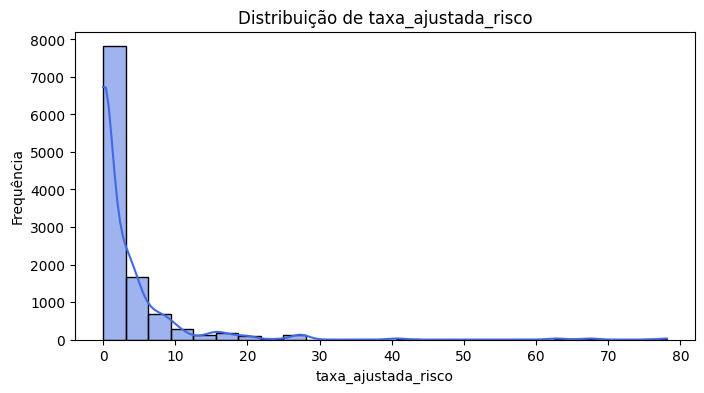

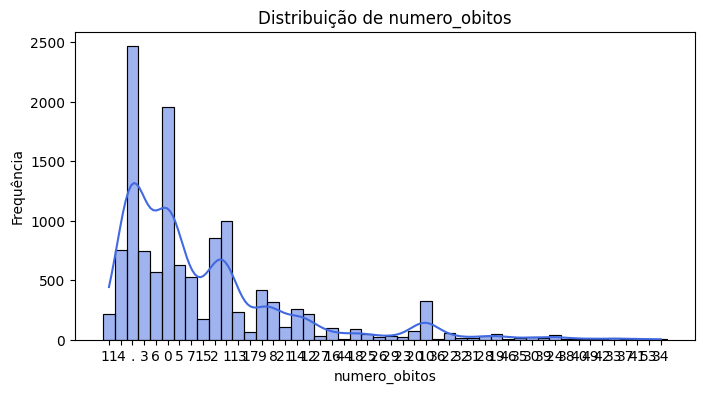

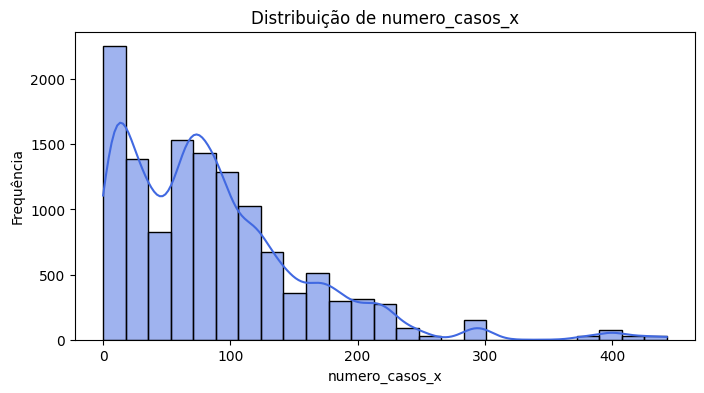

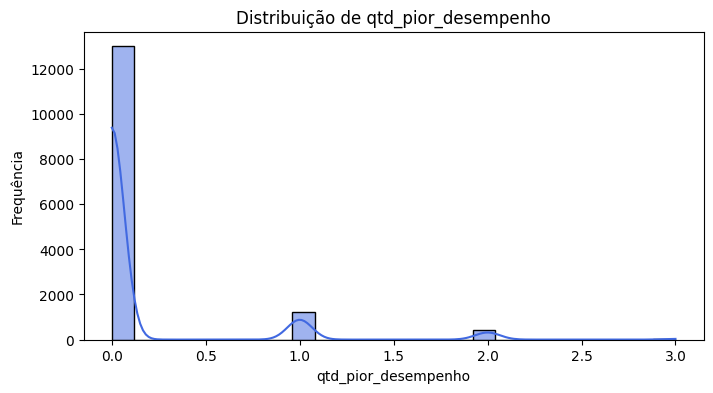

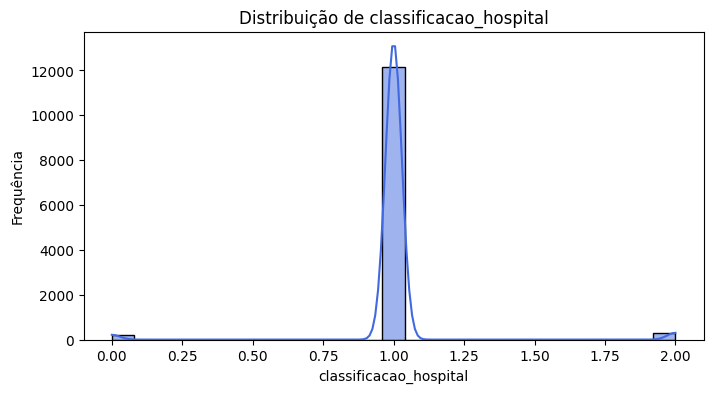

In [ ]:
for var in vars_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(base_dados[var].dropna(), kde=True, bins=25, color="royalblue")
    plt.title(f"Distribuição de {var}")
    plt.xlabel(var)
    plt.ylabel("Frequência")
    plt.show()

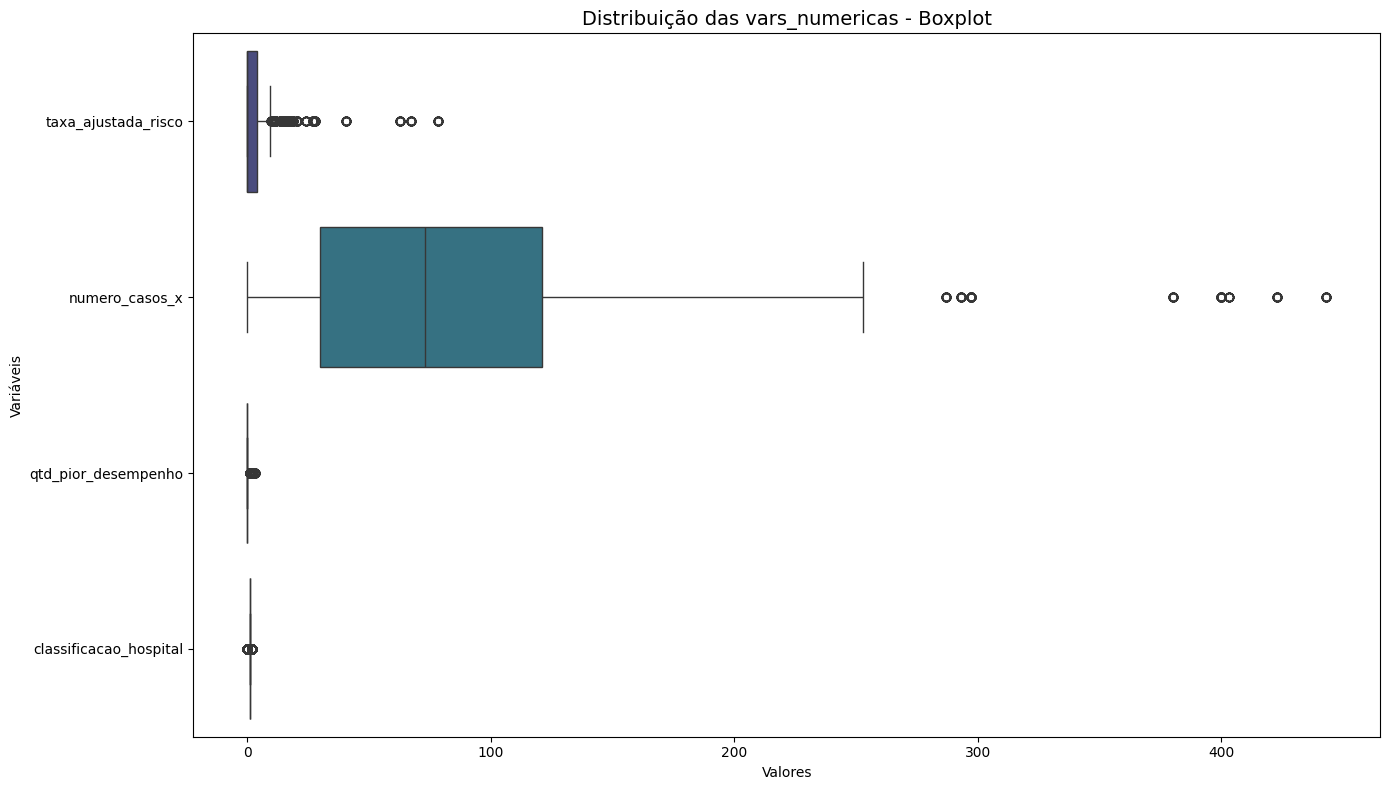

In [ ]:

plt.figure(figsize=(14, 8))

sns.boxplot(data=base_dados[vars_numericas], orient="h", palette="viridis")


plt.title("Distribuição das vars_numericas - Boxplot", fontsize=14)
plt.xlabel("Valores")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()

vimos que a distribuição das variaveis tem assimetria a direita, logo podemos fazer uma correlação de spearman que é a mais recomendada.

In [ ]:
tipo_coluna = base_dados['procedimento'].dtype

print(tipo_coluna)

object


In [ ]:
base_dados["numero_obitos"] = base_dados["numero_obitos"].replace("nan", np.nan)

base_dados["numero_obitos"] = pd.to_numeric(base_dados["numero_obitos"], errors="coerce")

base_dados["taxa_mortalidade"] = base_dados["taxa_mortalidade"].replace("nan", np.nan)

base_dados["taxa_mortalidade"] = pd.to_numeric(base_dados["taxa_mortalidade"], errors="coerce")

base_dados["procedimento"] = base_dados["procedimento"].replace("nan", np.nan)

base_dados["procedimento"] = pd.to_numeric(base_dados["procedimento"], errors="coerce")



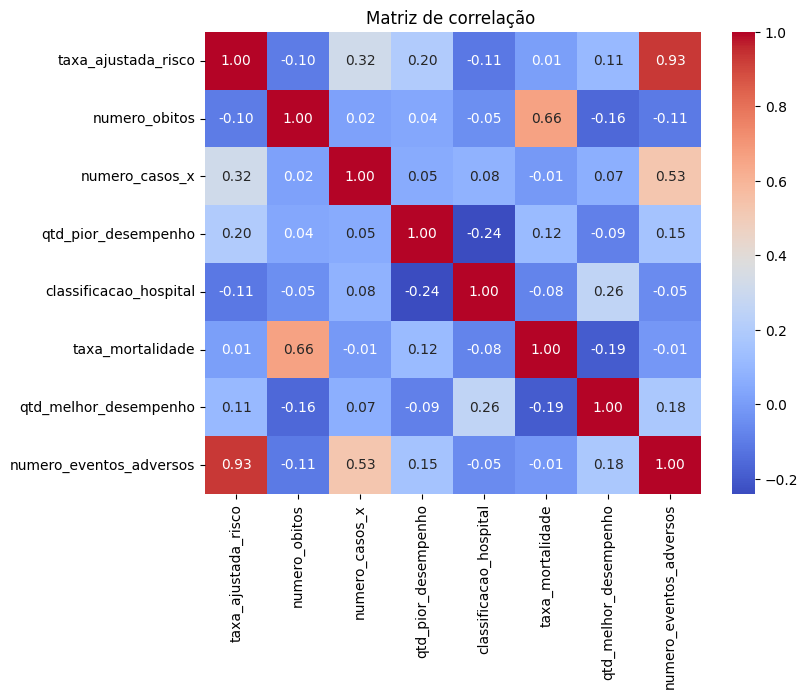

In [ ]:
# ['condado',
#  'id_oshpd',
#  'medida_desempenho',
#  'taxa_ajustada_risco',
#  'longitude',
#  'latitude',
#  'tipo_relatorio',
#  'classificacao_hospital',
#  'numero_casos_x',
#  'numero_eventos_adversos',
#  'ano',
#  'qtd_pior_desempenho',
#  'qtd_melhor_desempenho',
#  'avaliacao',
#  'procedimento_condicao',
#  'medida_desempenho_2',
#  'hospital_x',
#  'sistema',
#  'hospital_y',
#  'procedimento',
#  'taxa_mortalidade',
#  'numero_obitos',
#  'numero_casos_y',
#  'avaliacao_hospitalar']


corr = base_dados[["taxa_ajustada_risco", "numero_obitos", "numero_casos_x",
           "qtd_pior_desempenho", "classificacao_hospital","taxa_mortalidade", "qtd_melhor_desempenho", "numero_eventos_adversos" ]].corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlação ")
plt.show()


In [ ]:
estatisticas_da_base_de_dados = base_dados.describe()

display(estatisticas_da_base_de_dados)

,taxa_ajustada_risco,classificacao_hospital,numero_casos_x,numero_eventos_adversos,ano,qtd_pior_desempenho,qtd_melhor_desempenho,procedimento,taxa_mortalidade,numero_obitos
count,11078.000000,12610.000000,12610.000000,12610.000000,14696.000000,14696.000000,14696.000000,0.0,10034.000000,10074.000000
mean,3.321582,1.006503,86.609040,2.409040,2018.390310,0.150381,0.177872,NaN,5.997638,6.271193
std,7.731929,0.192958,73.353739,4.082232,1.588175,0.451654,0.404218,NaN,9.392446,7.131065
min,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,0.000000,1.000000,30.000000,0.000000,2017.000000,0.000000,0.000000,NaN,1.400000,1.000000
50%,0.000000,1.000000,73.000000,0.000000,2018.000000,0.000000,0.000000,NaN,3.400000,4.000000
75%,3.800000,1.000000,121.000000,3.000000,2020.000000,0.000000,0.000000,NaN,6.800000,9.000000
max,78.100000,2.000000,443.000000,24.000000,2021.000000,3.000000,2.000000,NaN,79.300000,53.000000


In [ ]:
for v in vars_numericas:
    Q1 = base_dados[v].quantile(0.25)
    Q3 = base_dados[v].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR


    qtd_outliers = base_dados[(base_dados[v] < limite_inferior) | (base_dados[v] > limite_superior)].shape[0]

    print(f"IQR {IQR:.2f}")
    print(f"Limite inferior {limite_inferior:.2f}")
    print(f"Limite superior {limite_superior:.2f}")
    print(f"Quantidade de outliers: {qtd_outliers}")

IQR 3.80
Limite inferior -5.70
Limite superior 9.50
Quantidade de outliers: 862
IQR 8.00
Limite inferior -11.00
Limite superior 21.00
Quantidade de outliers: 428
IQR 91.00
Limite inferior -106.50
Limite superior 257.50
Quantidade de outliers: 314
IQR 0.00
Limite inferior 0.00
Limite superior 0.00
Quantidade de outliers: 1692
IQR 0.00
Limite inferior 1.00
Limite superior 1.00
Quantidade de outliers: 470


# Criação do Target

In [ ]:

# Percentil 70 de mortalidade e mediana de óbitos por especialidade
base_dados['p70_mortalidade'] = base_dados["taxa_mortalidade"].quantile(0.70)
     # queremos destacar os hospitais no topo da distribuição, os 30% piores em termos de mortalidade

base_dados['mediana_obitos'] = base_dados["numero_obitos"].median()
 # aqui usamos a mediana pois a var numero_obitos é absoluta e sua distribuição tem assimetria à direita (cauda longa), ou seja: poucos hospitais com muitos óbitos e muitos hospitais com poucos

  # a média seria distorcida por hospitais muito grandes (com mais pacientes e óbitos naturais)

  # já a mediana representa o valor central da distribuição, ou seja o hospital “típico” em número de óbitos
base_dados['media_risco'] = base_dados["taxa_ajustada_risco"].mean()

 # aqui essa var já é ajustada estatisticamente para refletir risco clínico esperado, já é uma média ponderada calculada


In [ ]:
base_dados["target_mortalidade_alta"] = np.where (

    (base_dados["taxa_mortalidade"] > base_dados["p70_mortalidade"]) &
    (base_dados["numero_obitos"] > base_dados["mediana_obitos"])
    #&
    #(base_dados["taxa_ajustada_risco"] <= base_dados["media_risco"])
    #&
    #(base_dados["classificacao_hospital"] == 0)
    ,
    1,
    0
)

In [ ]:
base_dados = base_dados.drop(columns=["numero_casos_y", "numero_casos_x"])

In [ ]:
base_dados

,condado,id_oshpd,medida_desempenho,taxa_ajustada_risco,longitude,latitude,tipo_relatorio,classificacao_hospital,numero_eventos_adversos,ano,...,sistema,hospital_y,procedimento,taxa_mortalidade,numero_obitos,avaliacao_hospitalar,p70_mortalidade,mediana_obitos,media_risco,target_mortalidade_alta
0,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,1.0,0.0,2016,...,Independent/Other,Saint Rose Hospital,NaN,NaN,NaN,NaN,5.5,4.0,3.321582,0
1,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,1.0,0.0,2016,...,Independent/Other,Saint Rose Hospital,NaN,8.3,11.0,As Expected,5.5,4.0,3.321582,1
2,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,1.0,0.0,2016,...,Independent/Other,Saint Rose Hospital,NaN,23.3,4.0,As Expected,5.5,4.0,3.321582,0
3,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,1.0,0.0,2016,...,Independent/Other,Saint Rose Hospital,NaN,NaN,NaN,NaN,5.5,4.0,3.321582,0
4,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,1.0,0.0,2016,...,Independent/Other,Saint Rose Hospital,NaN,11.0,3.0,As Expected,5.5,4.0,3.321582,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14691,Ventura,106560525,Elective PCI Mortality,0.0,-118.74394,34.28973,PCI,1.0,0.0,2021,...,Adventist Health Systems,Adventist Health Simi Valley,NaN,3.3,8.0,As Expected,5.5,4.0,3.321582,0
14692,Ventura,106560525,Elective PCI Mortality,0.0,-118.74394,34.28973,PCI,1.0,0.0,2021,...,Adventist Health Systems,Adventist Health Simi Valley,NaN,1.2,1.0,As Expected,5.5,4.0,3.321582,0
14693,Ventura,106560525,Elective PCI Mortality,0.0,-118.74394,34.28973,PCI,1.0,0.0,2021,...,Adventist Health Systems,Adventist Health Simi Valley,NaN,9.2,9.0,Worse,5.5,4.0,3.321582,1
14694,Ventura,106560525,Elective PCI Mortality,0.0,-118.74394,34.28973,PCI,1.0,0.0,2021,...,Adventist Health Systems,Adventist Health Simi Valley,NaN,NaN,NaN,NaN,5.5,4.0,3.321582,0


In [ ]:
base_dados["target_mortalidade_alta"].value_counts(normalize=True)

,proportion
target_mortalidade_alta,
0,0.856424
1,0.143576


In [ ]:
print(base_dados['target_mortalidade_alta'].unique())

[0 1]


In [ ]:
base_dados.columns.tolist()

['condado',
 'id_oshpd',
 'medida_desempenho',
 'taxa_ajustada_risco',
 'longitude',
 'latitude',
 'tipo_relatorio',
 'classificacao_hospital',
 'numero_eventos_adversos',
 'ano',
 'qtd_pior_desempenho',
 'qtd_melhor_desempenho',
 'avaliacao',
 'procedimento_condicao',
 'medida_desempenho_2',
 'hospital_x',
 'sistema',
 'hospital_y',
 'procedimento',
 'taxa_mortalidade',
 'numero_obitos',
 'avaliacao_hospitalar',
 'p70_mortalidade',
 'mediana_obitos',
 'media_risco',
 'target_mortalidade_alta']

# Criação do grafo

Escolhemos um grafo não direcionado e ponderado Hospital–Hospital, híbrido, que combina 3 relações simétricas e clinicamente razoáveis:


1.	Mesmo sistema (organizacional) → forte influência operacional/gestão.


2.	Proximidade geográfica (espacial) → compartilham contexto/recursos regionais.


3.	Similaridade de perfil (clínico) → mortalidade/risco/óbitos parecidos.


In [ ]:
import networkx as nx
from math import radians, sin, cos, sqrt, atan2

colunas = [
    'hospital_y', 'sistema', 'condado',
    'latitude', 'longitude',
    'taxa_mortalidade', 'taxa_ajustada_risco', 'numero_obitos',
    'classificacao_hospital', 'avaliacao_hospitalar',
    'target_mortalidade_alta'
]
hosp = base_dados[colunas].drop_duplicates(subset='hospital_y').dropna(subset=['hospital_y'])


In [ ]:
def distancia_km(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    return 2 * R * atan2(sqrt(a), sqrt(1 - a))

In [ ]:
G = nx.Graph()

for _, row in hosp.iterrows():
    G.add_node(
        row['hospital_y'],
        sistema=row['sistema'],
        condado=row['condado'],
        latitude=row['latitude'],
        longitude=row['longitude'],
        taxa_mortalidade=row['taxa_mortalidade'],
        taxa_ajustada_risco=row['taxa_ajustada_risco'],
        numero_obitos=row['numero_obitos'],
        classificacao_hospital=row['classificacao_hospital'],
        avaliacao_hospitalar=row['avaliacao_hospitalar'],
        target_mortalidade_alta=row['target_mortalidade_alta']
    )


In [ ]:
for sistema, grupo in hosp.groupby('sistema'):
    hospitais = grupo['hospital_y'].tolist()
    for i in range(len(hospitais)):
        for j in range(i + 1, len(hospitais)):
            G.add_edge(hospitais[i], hospitais[j], weight=0.6)  # peso 0.6


In [ ]:

hosp['latitude'] = pd.to_numeric(hosp['latitude'], errors='coerce')
hosp['longitude'] = pd.to_numeric(hosp['longitude'], errors='coerce')


print(hosp[['latitude', 'longitude']].dtypes)
print(hosp[['latitude', 'longitude']].isna().sum())


latitude     float64
longitude    float64
dtype: object
latitude     0
longitude    0
dtype: int64


In [ ]:
for i, row1 in hosp.iterrows():
    for j, row2 in hosp.iterrows():
        if i < j:
            dist = distancia_km(row1['latitude'], row1['longitude'], row2['latitude'], row2['longitude'])
            if dist <= 50:  # até 50 km
                w = G.get_edge_data(row1['hospital_y'], row2['hospital_y'], {'weight': 0})['weight']
                G.add_edge(row1['hospital_y'], row2['hospital_y'], weight=w + 0.3)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

perfil = hosp[['taxa_mortalidade', 'taxa_ajustada_risco', 'numero_obitos']].fillna(0)
sim = cosine_similarity(perfil)

for i in range(len(hosp)):
    for j in range(i + 1, len(hosp)):
        if sim[i, j] > 0.9:  # muito parecidos
            w = G.get_edge_data(hosp.iloc[i]['hospital_y'], hosp.iloc[j]['hospital_y'], {'weight': 0})['weight']
            G.add_edge(hosp.iloc[i]['hospital_y'], hosp.iloc[j]['hospital_y'], weight=w + 0.1)


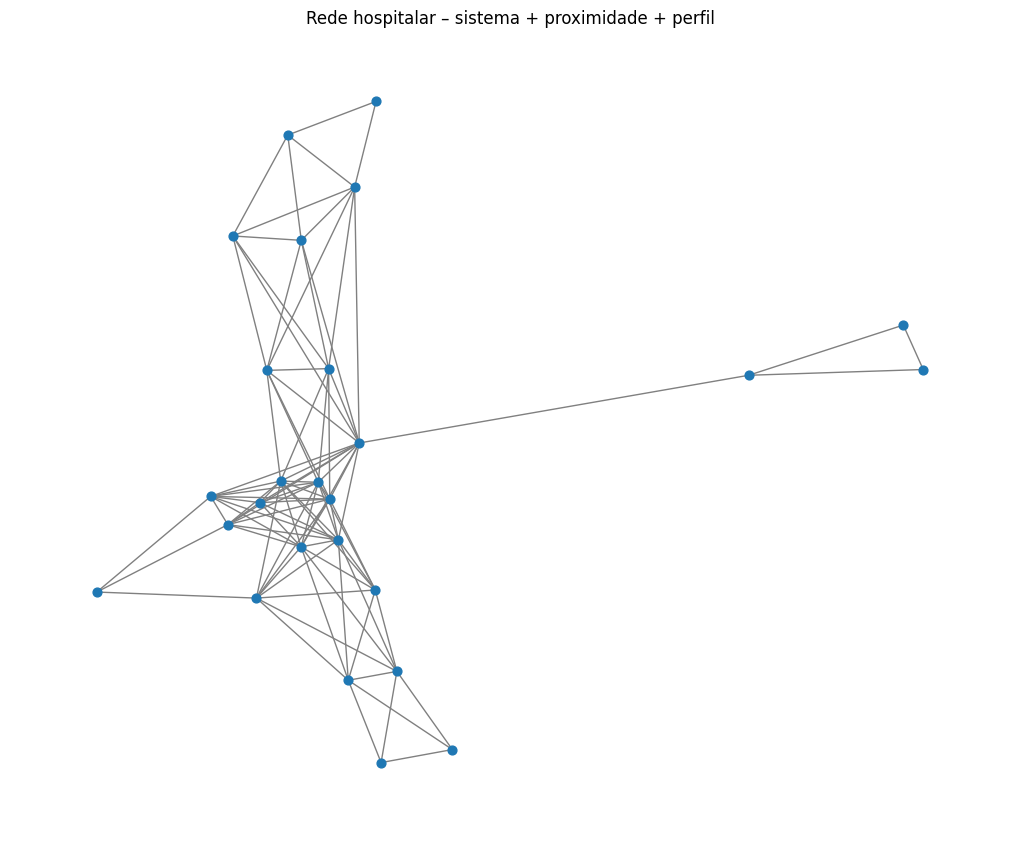

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
nx.draw(G, node_size=40, edge_color='gray', with_labels=False)
plt.title("Rede hospitalar – sistema + proximidade + perfil")
plt.show()


In [ ]:
# Grau - quantas conexões cada nó tem
grau = dict(nx.degree(G))

# Centralidade de intermediação - quãoconectado o grau é
betweenness = nx.betweenness_centrality(G)

# Centralidade de proximidade - quão perto está dos outros
closeness = nx.closeness_centrality(G)

# Agrupamento - densidade de vizinhos conectados
clustering = nx.clustering(G)

# Adicionar ao df
metricas = pd.DataFrame({
    'hospital_y': list(grau.keys()),
    'grau': list(grau.values()),
    'betweenness': [betweenness[n] for n in grau.keys()],
    'closeness': [closeness[n] for n in grau.keys()],
    'clustering': [clustering[n] for n in grau.keys()]
})


Quando você olha para o grafo:

Os grupos mais densos (com vários nós próximos e conectados) representam redes de hospitais fortemente interligados —
provavelmente da mesma região ou do mesmo grupo hospitalar.

Os nós mais isolados ou com poucas conexões representam hospitais independentes, geograficamente afastados ou sem vínculos de sistema.

O formato geral (meio “nuvem”) é um reflexo da estrutura regional da rede hospitalar — regiões urbanas tendem a formar clusters densos, enquanto áreas rurais ou pequenas formam componentes mais esparsos.

In [ ]:
metricas

,hospital_y,grau,betweenness,closeness,clustering
0,Saint Rose Hospital,7,0.073333,0.438596,0.619048
1,Kaiser Foundation Hospital Walnut Creek,12,0.109760,0.595238,0.666667
2,Clovis Community Medical Center,3,0.000000,0.316456,1.000000
3,Kaiser Foundation Hospital Baldwin Park,14,0.431840,0.657895,0.483516
4,Queen of the Valley Medical Center,8,0.025758,0.490196,0.678571
5,Los Alamitos Medical Center,3,0.153333,0.431034,0.333333
6,Sutter Roseville Medical Center,3,0.001111,0.396825,0.333333
7,Kaiser Foundation Hospital Roseville,9,0.024646,0.531915,0.805556
8,Kaiser Foundation Hospital South Sacramento,9,0.024646,0.531915,0.805556
9,Kaiser Foundation Hospital Rehabilitation Cen...,12,0.040417,0.568182,0.666667


In [ ]:
base_de_dados_2 = pd.merge(base_dados, metricas, on='hospital_y', how='left')

In [ ]:
base_de_dados_2

,condado,id_oshpd,medida_desempenho,taxa_ajustada_risco,longitude,latitude,tipo_relatorio,classificacao_hospital,numero_eventos_adversos,ano,...,numero_obitos,avaliacao_hospitalar,p70_mortalidade,mediana_obitos,media_risco,target_mortalidade_alta,grau,betweenness,closeness,clustering
0,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,1.0,0.0,2016,...,NaN,NaN,5.5,4.0,3.321582,0,7,0.073333,0.438596,0.619048
1,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,1.0,0.0,2016,...,11.0,As Expected,5.5,4.0,3.321582,1,7,0.073333,0.438596,0.619048
2,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,1.0,0.0,2016,...,4.0,As Expected,5.5,4.0,3.321582,0,7,0.073333,0.438596,0.619048
3,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,1.0,0.0,2016,...,NaN,NaN,5.5,4.0,3.321582,0,7,0.073333,0.438596,0.619048
4,Alameda,106010967,Elective PCI Emergency CABG,0.0,-122.08962,37.63291,PCI,1.0,0.0,2016,...,3.0,As Expected,5.5,4.0,3.321582,0,7,0.073333,0.438596,0.619048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14691,Ventura,106560525,Elective PCI Mortality,0.0,-118.74394,34.28973,PCI,1.0,0.0,2021,...,8.0,As Expected,5.5,4.0,3.321582,0,4,0.003333,0.333333,0.666667
14692,Ventura,106560525,Elective PCI Mortality,0.0,-118.74394,34.28973,PCI,1.0,0.0,2021,...,1.0,As Expected,5.5,4.0,3.321582,0,4,0.003333,0.333333,0.666667
14693,Ventura,106560525,Elective PCI Mortality,0.0,-118.74394,34.28973,PCI,1.0,0.0,2021,...,9.0,Worse,5.5,4.0,3.321582,1,4,0.003333,0.333333,0.666667
14694,Ventura,106560525,Elective PCI Mortality,0.0,-118.74394,34.28973,PCI,1.0,0.0,2021,...,NaN,NaN,5.5,4.0,3.321582,0,4,0.003333,0.333333,0.666667


In [ ]:

# -----------------------------
# funções auxiliares
# -----------------------------
def infer_cols(df, target):
  #separa as colunas em categoricas e númericas
    base = [c for c in df.columns if c != target]
    num_cols = [c for c in base if pd.api.types.is_numeric_dtype(df[c])]
    cat_cols = [c for c in base if c not in num_cols]
    return num_cols, cat_cols


def make_preprocessor(num_cols, cat_cols, scale_numeric=True):
  #StandardScaler para numéricas e OneHotEncoder para categóricas, handle_unknown="ignore" para não quebrar quando surgirem categorias novas no deploy
    transformers = []
    if num_cols:
        transformers.append(("num", StandardScaler() if scale_numeric else "passthrough", num_cols))
    if cat_cols:
        transformers.append(("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols))
    return ColumnTransformer(transformers)


def best_threshold_f1(y_true, proba):
  #Percorre a curva precision–recall, calcula o F1 em cada ponto e devolve o threshold que maximiza F1
    p, r, t = precision_recall_curve(y_true, proba)
    f1 = np.where((p + r) > 0, 2 * p * r / (p + r), 0)
    thr = t[np.argmax(f1)] if len(t) else 0.5
    return float(thr)


# -----------------------------
# pipeline xgboost (com drop_cols e retorno detalhado)
# -----------------------------
def run_xgb_pipeline(
    df,
    target="target_mortalidade_alta",
    drop_cols=None,            # <--- NOVO: lista de colunas para remover (ex.: vazamento)
    scale_numeric=True,
    test_size=0.2,
    random_state=42,
    tune_threshold=True,
    xgb_params=None,
    return_test_outputs=True   # <--- NOVO: retorna y_test, proba_test, y_pred
):
    # remover colunas indesejadas (ex.: vazamento)
    drop_cols = drop_cols or []
    cols_to_drop = [c for c in drop_cols if c in df.columns]

    # separar variáveis
    num_cols, cat_cols = infer_cols(df, target)
    y = df[target].astype(int).values
    X = df.drop(columns=[target] + cols_to_drop)

    # split estratificado garante a memsma proporção
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # pré-processamento
    pre = make_preprocessor(
        [c for c in num_cols if c in X_train.columns],
        [c for c in cat_cols if c in X_train.columns],
        scale_numeric=scale_numeric
    )

    # cálculo do peso da classe minoritária
    pos = int((y_train == 1).sum())
    neg = int((y_train == 0).sum())
    spw = max(neg / max(pos, 1), 1.0)

    # parâmetros padrão
    default_params = dict(
        objective="binary:logistic",
        eval_metric="logloss",
        n_estimators=600,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        scale_pos_weight=spw,
        random_state=random_state,
        n_jobs=-1
    )
    if xgb_params:
        default_params.update(xgb_params)

    # modelo
    clf = XGBClassifier(**default_params)

    # pipeline
    pipe = Pipeline(steps=[("pre", pre), ("clf", clf)])

    # treino
    pipe.fit(X_train, y_train)

    # probabilidades e predições
    proba_test = pipe.predict_proba(X_test)[:, 1]
    thr = best_threshold_f1(y_test, proba_test) if tune_threshold else 0.5
    y_pred = (proba_test >= thr).astype(int)

    # métricas
    roc = roc_auc_score(y_test, proba_test)
    pr_auc = average_precision_score(y_test, proba_test)
    report = classification_report(y_test, y_pred, digits=3, zero_division=0)

    print(f"[XGBoost] Threshold ótimo: {thr:.3f}")
    print("ROC-AUC :", f"{roc:.3f}")
    print("PR-AUC  :", f"{pr_auc:.3f}")
    print(report)

    info = {
        "threshold": thr,
        "roc_auc": roc,
        "pr_auc": pr_auc,
        "scale_pos_weight": spw,
        "params": default_params,
        "dropped_cols": cols_to_drop
    }

    if return_test_outputs:
        info.update({
            "y_test": y_test,
            "proba_test": proba_test,
            "y_pred": y_pred
        })

    return pipe, info


In [ ]:
cols_vazamento = ['taxa_mortalidade','numero_obitos','p70_mortalidade','mediana_obitos','media_risco']

xgb_model, xgb_info = run_xgb_pipeline(
    df=base_dados,
    target="target_mortalidade_alta",
    drop_cols=cols_vazamento,     # remove vazamentos
    scale_numeric=True,
    tune_threshold=True,
    test_size=0.2,
    random_state=42
)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


[XGBoost] Threshold ótimo: 0.120
ROC-AUC : 0.806
PR-AUC  : 0.447
              precision    recall  f1-score   support

           0      1.000     0.526     0.689      2518
           1      0.261     1.000     0.414       422

    accuracy                          0.594      2940
   macro avg      0.631     0.763     0.552      2940
weighted avg      0.894     0.594     0.650      2940



Vemos que, na classe 0 (baixa mortalidade), o modelo teve uma precisão de 100%, ou seja, tudo que ele chamou de baixa mortalidade realmente era. Porém ele só encontrou 52% dos hospitais dessa classe, então quase metade foi confundida com alta mortalidade.

Já na classe 1 (alta mortalidade), a precisão foi de 26%. Ou seja dos hospitais que ele classificou como críticos só 26% realmente eram. Mas em compensação, o modelo acertou todos os hospitais críticos (recall de 100%), o que é ótimo no nosso contexto. Afinal é melhor errar classificando um hospital como crítico quando ele não é do que deixar de identificar um hospital que realmente precisa de atenção.

In [ ]:
cols_vazamento = ['taxa_mortalidade','numero_obitos','p70_mortalidade','mediana_obitos','media_risco']

xgb_model, xgb_info = run_xgb_pipeline(
    df=base_de_dados_2,
    target="target_mortalidade_alta",
    drop_cols=cols_vazamento,     # remove vazamentos
    scale_numeric=True,
    tune_threshold=True,
    test_size=0.2,
    random_state=42
)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


[XGBoost] Threshold ótimo: 0.143
ROC-AUC : 0.806
PR-AUC  : 0.448
              precision    recall  f1-score   support

           0      0.999     0.531     0.693      2518
           1      0.262     0.995     0.415       422

    accuracy                          0.598      2940
   macro avg      0.630     0.763     0.554      2940
weighted avg      0.893     0.598     0.653      2940



Depois que adicionamos as métricas do grafo (como grau, betweenness, closeness e clustering), o modelo continuou estável, mas com uma melhora leve nas métricas gerais.
O ROC-AUC ficou em 0.806 e o PR-AUC subiu um pouco, mostrando que as variáveis da rede ajudaram o modelo a entender melhor o comportamento dos hospitais.

Na prática, isso quer dizer que o modelo começou a enxergar não só os hospitais isoladamente, mas também como eles se conectam e se influenciam entre si dentro da rede.
Mesmo que o ganho numérico não tenha sido grande, as variáveis de grafo trouxeram contexto e mostraram que a estrutura das relações entre os hospitais tem impacto na mortalidade.

# GNN

A ideia de usar uma graph neural network é porque ela permite que o modelo aprenda não só pelas características individuais de cada hospital mas também pelas conexões entre eles.

Enquanto modelos tradicionais, como o XGBoost, olham cada hospital de forma isolada considerando só suas próprias variáveis  a GNN entende que os hospitais fazem parte de uma rede.
Eles podem estar próximos geograficamente, pertencer ao mesmo sistema de saúde ou ter características parecidas.

Essas relações importam, porque muitas vezes um hospital pode influenciar o outro por exemplo em casos de transferência de pacientes compartilhamento de recursos ou até situações regionais que afetam todos os hospitais próximos.

Então a GNN serve pra capturar esse tipo de relação estrutural.
Ela aprende trocando informações entre os nós (os hospitais) e consegue perceber padrões que não apareceriam olhando cada hospital separadamente.

In [ ]:
pip install torch


In [ ]:
pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.6 MB/s eta 0:00:00


In [ ]:
import torch
from torch import nn
from torch_geometric.utils import from_networkx
from torch_geometric.data import Data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = base_dados.copy()

In [ ]:
safe_feats = [
    'taxa_ajustada_risco',
    'numero_eventos_adversos',
    'qtd_pior_desempenho',
    'qtd_melhor_desempenho',
    'ano',
    'deg_cent','bet_cent','clo_cent','clustering','comp_size'
]
safe_feats = [c for c in safe_feats if c in df.columns]  # só as que existirem

#filtrar linhas com target válido
df = df.loc[df['target_mortalidade_alta'].isin([0,1])].reset_index(drop=True)

#mapear hospital_y -> índice (0..N-1)
hosp_ids = df['hospital_y'].astype(str).values
idx_map = {h:i for i,h in enumerate(hosp_ids)}
df['node_idx'] = df['hospital_y'].astype(str).map(idx_map)

#garantir que o grafo tenha os mesmos nós  e adiciona se faltar)
for h in hosp_ids:
    if not G.has_node(h):
        G.add_node(h)

H = G.subgraph(hosp_ids)
pyg_data = from_networkx(H)

#montar matriz de features X e vetor y na mesma ordem dos node_idx
df = df.sort_values('node_idx').reset_index(drop=True)
X = df[safe_feats].fillna(0.0).values.astype(np.float32)
y = df['target_mortalidade_alta'].values.astype(np.float32)

# scalonamento de X (
scaler = StandardScaler()
X = scaler.fit_transform(X).astype(np.float32)


edge_index = torch.stack([
    torch.tensor([idx_map[u] for u,v in H.edges()], dtype=torch.long),
    torch.tensor([idx_map[v] for u,v in H.edges()], dtype=torch.long)
], dim=0)


from torch_geometric.utils import to_undirected, remove_self_loops
edge_index, _ = remove_self_loops(edge_index)
edge_index = to_undirected(edge_index)

data = Data(
    x=torch.tensor(X, dtype=torch.float32),
    y=torch.tensor(y, dtype=torch.float32),
    edge_index=edge_index
)
num_nodes = data.num_nodes
num_feats = data.num_features

In [ ]:
# índices dos nós
all_idx = np.arange(num_nodes)
y_np = y.copy()

# (val+test)
idx_train, idx_temp, y_train, y_temp = train_test_split(
    all_idx, y_np, test_size=0.4, stratify=y_np, random_state=42
)
# depois: val vs test
idx_val, idx_test, _, _ = train_test_split(
    idx_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

train_mask = torch.zeros(num_nodes, dtype=torch.bool); train_mask[idx_train] = True
val_mask   = torch.zeros(num_nodes, dtype=torch.bool); val_mask[idx_val]   = True
test_mask  = torch.zeros(num_nodes, dtype=torch.bool); test_mask[idx_test] = True

data.train_mask = train_mask
data.val_mask   = val_mask
data.test_mask  = test_mask

pos_frac = float((data.y[train_mask] == 1).sum()) / float(train_mask.sum())
print(f"Positivos no treino: {pos_frac:.3f}")


Positivos no treino: 0.144


In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, GCNConv

class GNN(torch.nn.Module):
    def __init__(self, in_feats, hidden=64, dropout=0.3, kind="sage"):
        super().__init__()
        if kind == "sage":
            self.conv1 = SAGEConv(in_feats, hidden)
            self.conv2 = SAGEConv(hidden, hidden)
        elif kind == "gcn":
            self.conv1 = GCNConv(in_feats, hidden)
            self.conv2 = GCNConv(hidden, hidden)
        else:
            raise ValueError("kind deve ser 'sage' ou 'gcn'")

        self.dropout = dropout
        self.head = nn.Linear(hidden, 1)  # binário

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        logit = self.head(x).view(-1)
        return logit  # usar BCEWithLogitsLoss


In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

device = torch.device("cpu")  # use "cuda" se tiver GPU
model = GNN(in_feats=num_feats, hidden=64, dropout=0.4, kind="sage").to(device)
data = data.to(device)

# pos_weight = (#neg / #pos) no TREINO
pos = (data.y[data.train_mask] == 1).sum().item()
neg = (data.y[data.train_mask] == 0).sum().item()
pos_weight = torch.tensor(max(neg / max(pos,1), 1.0), dtype=torch.float32, device=device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=5e-4)

def eval_split(mask):
    model.eval()
    with torch.no_grad():
        logit = model(data.x, data.edge_index)
        proba = torch.sigmoid(logit[mask]).cpu().numpy()
        ytrue = data.y[mask].cpu().numpy()
        roc = roc_auc_score(ytrue, proba)
        pr  = average_precision_score(ytrue, proba)
    return roc, pr

best_val = -1
best_state = None
patience = 20
no_improve = 0
epochs = 300

for epoch in range(1, epochs+1):
    model.train()
    optimizer.zero_grad()
    logit = model(data.x, data.edge_index)
    loss = criterion(logit[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    if epoch % 5 == 0 or epoch == 1:
        roc_tr, pr_tr = eval_split(data.train_mask)
        roc_va, pr_va = eval_split(data.val_mask)
        print(f"Ep {epoch:03d} | loss {loss.item():.4f} | TR ROC {roc_tr:.3f} PR {pr_tr:.3f} "
              f"| VA ROC {roc_va:.3f} PR {pr_va:.3f}")

        # early stopping pelo PR-AUC de validação
        score = pr_va
        if score > best_val:
            best_val = score
            best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                print("Early stopping.")
                break

# carregar melhor estado
if best_state is not None:
    model.load_state_dict({k: v.to(device) for k, v in best_state.items()})

roc_te, pr_te = eval_split(data.test_mask)
print(f"[TEST] ROC-AUC: {roc_te:.3f} | PR-AUC: {pr_te:.3f}")


Ep 001 | loss 1.1979 | TR ROC 0.503 PR 0.144 | VA ROC 0.485 PR 0.142
Ep 005 | loss 1.1808 | TR ROC 0.607 PR 0.195 | VA ROC 0.607 PR 0.190
Ep 010 | loss 1.1728 | TR ROC 0.613 PR 0.196 | VA ROC 0.611 PR 0.191
Ep 015 | loss 1.1676 | TR ROC 0.612 PR 0.195 | VA ROC 0.610 PR 0.190
Ep 020 | loss 1.1643 | TR ROC 0.612 PR 0.195 | VA ROC 0.608 PR 0.189
Ep 025 | loss 1.1579 | TR ROC 0.612 PR 0.196 | VA ROC 0.610 PR 0.190
Ep 030 | loss 1.1568 | TR ROC 0.613 PR 0.196 | VA ROC 0.610 PR 0.190
Ep 035 | loss 1.1596 | TR ROC 0.614 PR 0.197 | VA ROC 0.611 PR 0.191
Ep 040 | loss 1.1542 | TR ROC 0.615 PR 0.197 | VA ROC 0.611 PR 0.191
Ep 045 | loss 1.1514 | TR ROC 0.616 PR 0.198 | VA ROC 0.612 PR 0.192
Ep 050 | loss 1.1535 | TR ROC 0.617 PR 0.198 | VA ROC 0.613 PR 0.192
Ep 055 | loss 1.1529 | TR ROC 0.618 PR 0.199 | VA ROC 0.614 PR 0.192
Ep 060 | loss 1.1510 | TR ROC 0.619 PR 0.199 | VA ROC 0.615 PR 0.193
Ep 065 | loss 1.1553 | TR ROC 0.620 PR 0.200 | VA ROC 0.615 PR 0.193
Ep 070 | loss 1.1478 | TR ROC 0.62

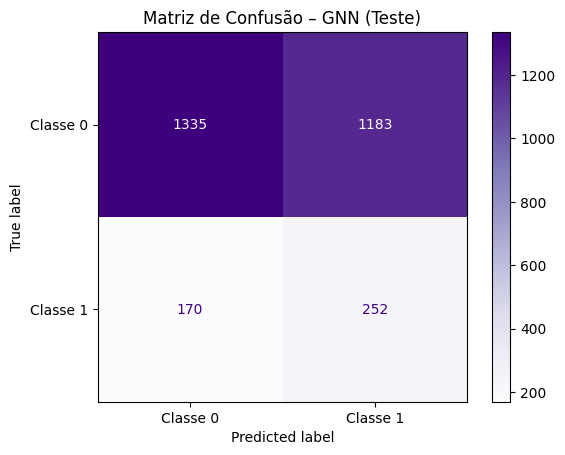

In [ ]:
# coloca o modelo em modo avaliação
model.eval()

# gera as probabilidades (logits -> sigmoid)
with torch.no_grad():
    logits = model(data.x, data.edge_index)
    probs = torch.sigmoid(logits).squeeze()

# converte para predições binárias com threshold 0.5
y_pred = (probs >= 0.5).cpu().numpy()
y_true = data.y.cpu().numpy()

# usa apenas os nós de teste
mask = data.test_mask.cpu().numpy()
y_pred_test = y_pred[mask]
y_true_test = y_true[mask]

#matriz de confusão
cm = confusion_matrix(y_true_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap="Purples", values_format="d")
plt.title("Matriz de Confusão – GNN (Teste)")
plt.show()

Mesmo sendo modelos diferentes, o XGBoost e a GNN acabaram aprendendo praticamente as mesmas informações principais, porque as duas estão usando as mesmas variáveis da base tabular.
A diferença está em como cada uma enxerga os dados, o XGBoost olha para cada hospital de forma isolada sem considerar as relações entre eles, enquanto a GNN tenta entender cada hospital junto com seus vizinhos no grafo Trocando informações entre os nós.

No nosso caso, como o grafo ainda é pequeno e tem poucas conexões fortes, os hospitais não estão “influenciando” tanto uns aos outros.
Por isso a GNN não teve uma grande vantagem sobre o XGBoost as variáveis tabulares ainda são o que mais ajudam o modelo a aprender.

Mas tem um ponto muito positivo nisso, mesmo com pouco contexto de rede, a GNN conseguiu resultados bem parecidos com o modelo supervisionado puro.
Isso mostra que o pipeline está funcionando direitinho, que a rede realmente aprendeu padrões úteis e que o grafo não atrapalhou o aprendizado.

Ou seja, a GNN está estável o que já é um ótimo sinal
Ela aprendeu no mesmo nível de um modelo tradicional mas tem potencial para ir além se futuramente o grafo tiver mais conexões ou variáveis que representem melhor as relações entre os hospitais.

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

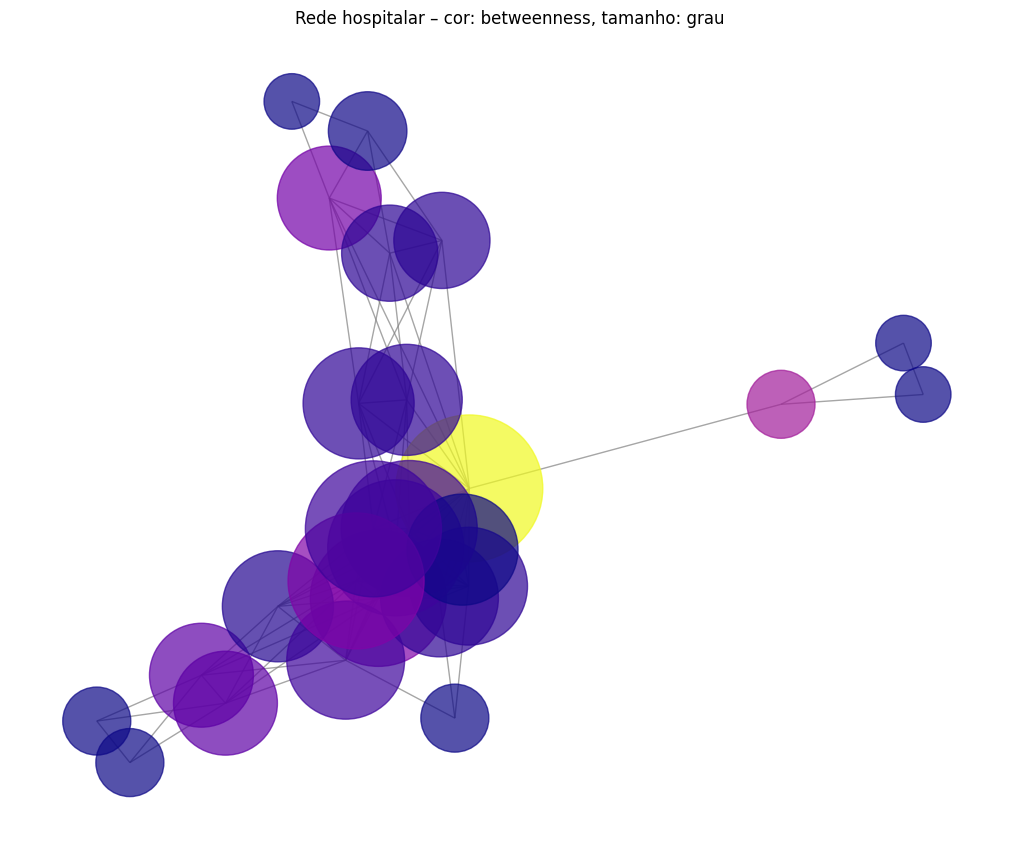

In [ ]:
nx.set_node_attributes(G, grau, 'grau')
nx.set_node_attributes(G, betweenness, 'betweenness')
nx.set_node_attributes(G, closeness, 'closeness')
nx.set_node_attributes(G, clustering, 'clustering')

# --- obter listas coerentes de tamanho ---
grau_vals = [G.nodes[n].get('grau', 0) for n in G.nodes()]
bet_vals = [G.nodes[n].get('betweenness', 0) for n in G.nodes()]

# --- plotar ---
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    node_size=[v * 800 for v in grau_vals],  # tamanho proporcional ao grau
    node_color=bet_vals,                      # cor conforme betweenness
    cmap=plt.cm.plasma,
    edge_color="gray",
    alpha=0.7,
    with_labels=False
)

plt.title("Rede hospitalar – cor: betweenness, tamanho: grau")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label="Betweenness")
plt.show()

In [ ]:
print(f"Número de nós (hospitais): {G.number_of_nodes()}")
print(f"Número de arestas (conexões): {G.number_of_edges()}")

# grau médio (número médio de conexões por hospital)
grau_medio = sum(dict(G.degree()).values()) / G.number_of_nodes()
print(f"Grau médio da rede: {grau_medio:.2f}")

# verificar se há nós isolados
nos_isolados = list(nx.isolates(G))
print(f"Nós isolados (sem conexões): {len(nos_isolados)}")


Número de nós (hospitais): 26
Número de arestas (conexões): 94
Grau médio da rede: 7.23
Nós isolados (sem conexões): 0


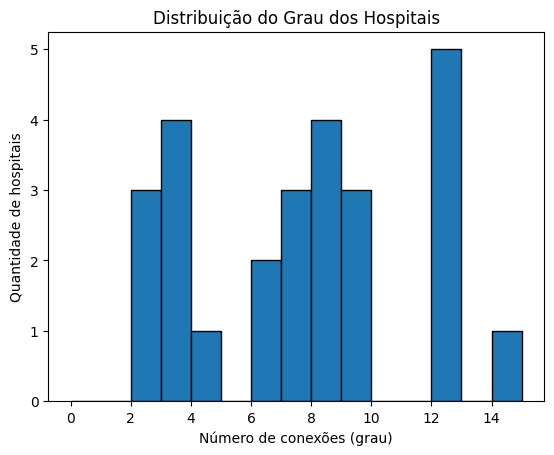

In [ ]:
graus = [v for k, v in dict(G.degree()).items()]

plt.hist(graus, bins=range(0, max(graus)+2), edgecolor='black')
plt.title("Distribuição do Grau dos Hospitais")
plt.xlabel("Número de conexões (grau)")
plt.ylabel("Quantidade de hospitais")
plt.show()
